In [46]:
import numpy as np
import pandas as pd 
import pymc3 as pm
from scipy.stats import beta

In [227]:
np.random.seed(87)

y1 = np.zeros(2500)
y1[np.random.randint(0,2500,50)] = 1

y2 = np.zeros(2500)
y2[np.random.randint(0,2500,42)] = 1

In [228]:
observations_A = sum(y1)
observations_B = sum(y2)

observations_A, observations_B

(50.0, 42.0)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_B, p_A]


Sampling 4 chains for 1_000 tune and 50_000 draw iterations (4_000 + 200_000 draws total) took 120 seconds.


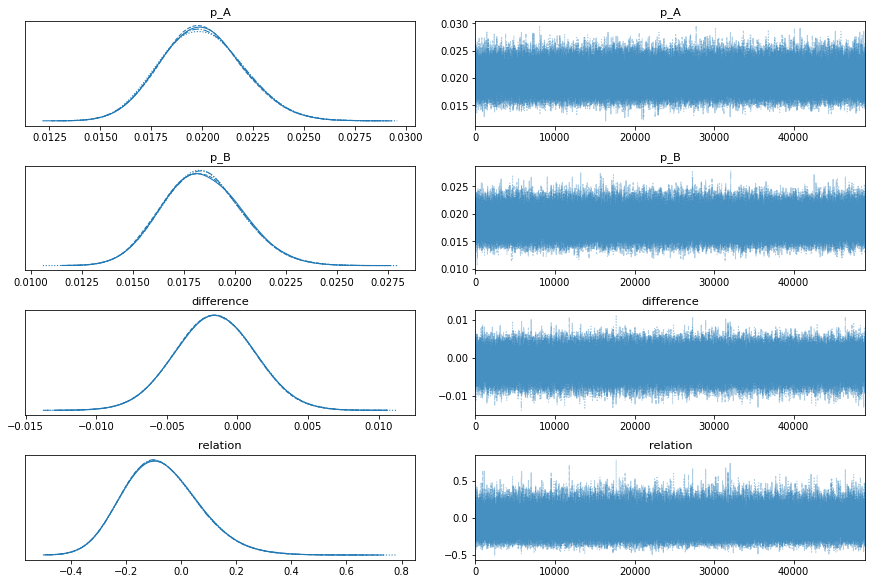

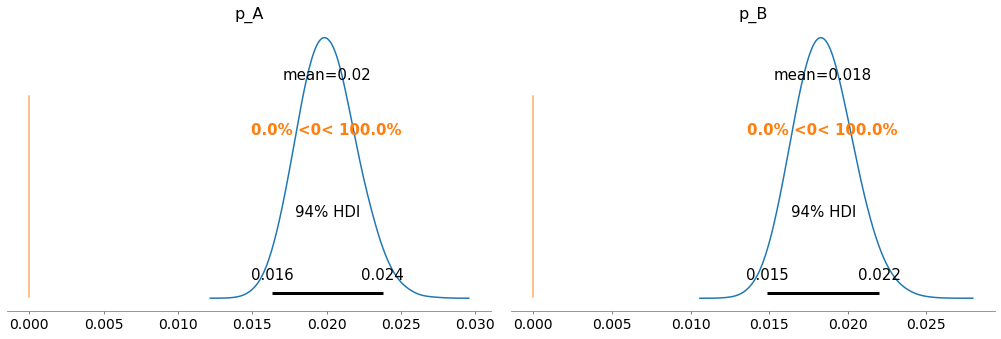

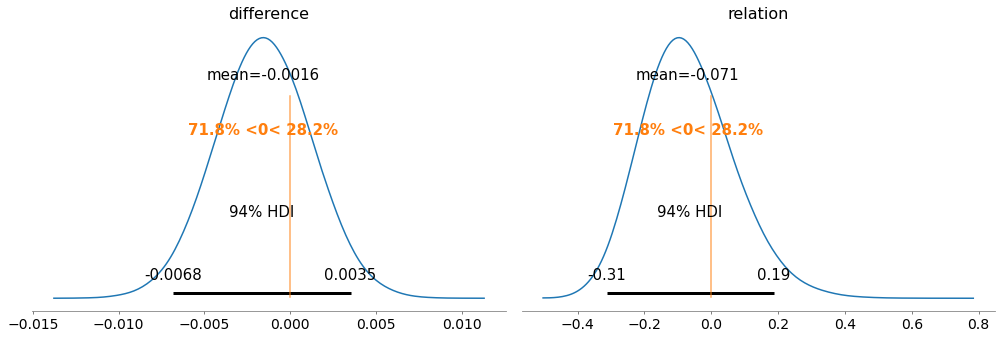

In [244]:
with pm.Model() as model:

    # define priors
    p_A = pm.Beta('p_A', alpha=50, beta=2450)
    p_B = pm.Beta('p_B', alpha=50, beta=2450)

    # define likelihood
    obs_A = pm.Binomial('obs_A', n=len(y1), p=p_A, observed=observations_A)
    obs_B = pm.Binomial('obs_B', n=len(y2), p=p_B, observed=observations_B)
    
    # define metrics
    pm.Deterministic('difference', p_B - p_A)
    pm.Deterministic('relation', (p_B/p_A) - 1)
    
    trace = pm.sample(draws=50000, progressbar=True)
    
    pm.traceplot(trace[1000:])
    
    pm.plot_posterior(trace, var_names=['p_A', 'p_B'], 
                      ref_val=0)
    
    pm.plot_posterior(trace, var_names=['difference', 'relation'], 
                      ref_val=0)